<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tratamiento-de-outliers-o-valores-perdidos" data-toc-modified-id="Tratamiento-de-outliers-o-valores-perdidos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tratamiento de <em>outliers</em> o valores perdidos</a></span></li><li><span><a href="#Eliminar-outliers" data-toc-modified-id="Eliminar-outliers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Eliminar <em>outliers</em></a></span></li><li><span><a href="#Reemplazar" data-toc-modified-id="Reemplazar-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reemplazar</a></span></li></ul></div>

# Tratamiento de *outliers* o valores perdidos

Los *outliers* o valores perdidos son observaciones anormales en nuestros datos que puede afectar potencialmente nuestros análisis. 

> Es decir, un *outlier* es una observación dentro de nuestros datos que nos es consistente con el resto, que se escapa. 

Imaginemos que estamos midiendo el peso de las alumnas de una clase y son los siguientes:

```python
pesos = [92.31, 76.4, 87.3, 60.86, 65.96, 74.23, 87.56, 82.47, 69.27, 81.69]
```

- el peso máximo es de 92.31


- el peso mínimo es de 60.86


- la media del peso de la clase sería 77.085. 


- la distancia del máximo y del mínimo a la media es de 14.504 y 16.94 respectivamente. 

**Como vemos la media se sitúa en la mitad del intervalo y nos podría dar una muy buena estimación del peso de la clase** 


Imaginemos ahora que el peso de los 10 las alumnas son: 

```python
pesos2 = [92.31, 76.4, 117.3, 60.86, 65.96, 74.23, 87.56, 82.47, 69.27, 81.69]
```
En este caso: 

- el peso máximo es de 117.3


- el peso mínimo es de 60.86


- la media del peso de la clase sería 80.805. 


- la distancia del máximo y del mínimo a la media es de 36.49 y 19.94 respectivamente. 

**En este caso la media ya no está situada aproximadamente en la mitad del intervalo**. El efecto de la alumna que tiene un mayor perso ha hecho que la media aritmética se haya desplazado hacia el valor máximo y por lo tanto ya no es tan buena representación de como se reparten los pesos en la clase.  


Es en este caso, cuando el tratamiento de los *outliers* debe ser solucionado. Esto lo podemos hacer de distintas formas: 

- Eliminación de esos registros 


- Reemplazar por la media, mediana, moda...


- Mantenerlos (si el problema a resolver tiene que ver con outliers). 


Pero antes de ponernos a quitar datos o reemplazarlos tenemos que identificar cuales son los *outliers* en nuestro datos. 

- Lo podemos hacer visualmente usando un `boxplot`. 


In [26]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv("data/california_nonull.csv", index_col = 0)
df.head()

,state,gender,median_home_val,total_baños,income,dist_playa,num_vecinos,num_habitaciones
0,FL,M,1158.437751,430.0,392.000000,12.203275,466.0,520.0
1,IL,F,537.000000,415.0,365.000000,5.666667,410.0,473.0
2,FL,F,725.000000,340.0,301.000000,4.111111,361.0,436.0
3,NC,M,1158.437751,407.0,322.970618,27.277778,375.4,413.0
4,FL,F,995.000000,280.0,274.743639,6.000000,316.0,348.0


In [28]:
# seleccionamos solo aquellas variables numéricas

df_numericas = df.select_dtypes(include=np.number)
df_numericas.head(2)

,median_home_val,total_baños,income,dist_playa,num_vecinos,num_habitaciones
0,1158.437751,430.0,392.0,12.203275,466.0,520.0
1,537.000000,415.0,365.0,5.666667,410.0,473.0


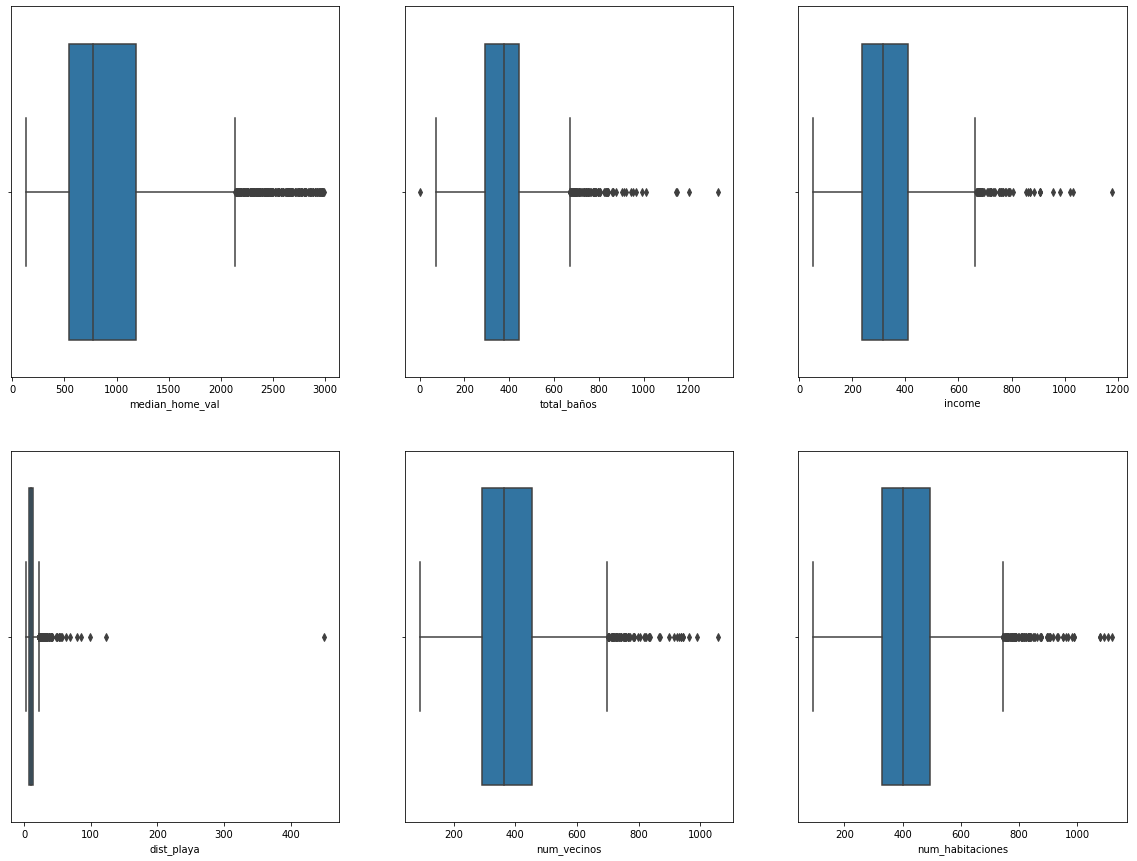

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x=columna, data=df_numericas, ax=axes[indice])
plt.show()

Hemos identificado visualmente los *outliers* en nuestras variables numéricas, pero en realidad no sabemos que valores son los que son los *outliers*. ¿Cómo lo podríamos hacer?

Calcularemos  el rango intercuartílico (IQR) siguiendo los siguientes pasos: 

- Calcular el primer cuartil (Q1, 25%): donde el 25% de los datos son menores o iguales al valor del Q1. 


- Calcular el tercer cuartil (Q3, 75%): donde el 75% de los datos son menores o iguales al valor de Q3


- Calcular el rango intercuartil (IQR), es la diferencia entre el Q3 y Q1

```
IQR  = Q3 - Q1
```

> Todos los valors que sean **menores que `Q1 - 1.5IQR`** o **mayores que `Q3 + 1.5IQR`** serán considerados outliers. 

**Empecemos con la variable `total_baños`**

Para calcular los cuartiles recurriremos a la librería NumPy donde encontratemos los siguientes métodos: 

- `np.percentile`: lo usaremos cuando **no** tengamos **nan** entre nuestros valores. 


- `np.nanpercentile`: lo usaremos cuando tengamos nan entre nuestros valores. 

En ambos casos tendremos que pasarle: 

- La columna sobre la que queramos calcular los cuartiles 


- El cuartil que queremos calcular. 

In [30]:
# cálculo del Q1
Q1 = np.nanpercentile(df['total_baños'], 25)
Q1

291.0

In [31]:
# cálculo del Q3
Q3 = np.nanpercentile(df['total_baños'], 75)
Q3

443.0

In [32]:
#calculemos el IQR 

IQR = Q3 - Q1
IQR

152.0

In [33]:
# multiplicamos el IQR por 1.5

outlier_step = 1.5 * IQR
outlier_step

228.0

Ahora es el momento de filtrar nuestros datos filtrar/eliminar aquellos datos que sean *outliers*, es decir, vamos a crearnos un *dataframe* con los datos que cumplan dos condiciones: 

- Que sean menor que el valor de Q1 - outlier_step


- Que sean mayores que el valor de Q3 + outlier_step

In [34]:
outliers_data = df[(df["total_baños"] < Q1 - outlier_step) | (df["total_baños"] > Q3 + outlier_step)]

In [35]:
outliers_data

,state,gender,median_home_val,total_baños,income,dist_playa,num_vecinos,num_habitaciones
5,NV,F,1569.0,672.0,673.000000,13.000000,785.0,781.0
42,TX,M,1043.0,682.0,610.000000,13.938255,731.0,788.0
71,CA,F,2725.0,684.0,629.000000,15.000000,662.0,734.0
85,CA,F,2750.0,701.0,668.000000,11.444444,717.0,781.0
167,FL,M,1432.0,693.0,600.372936,13.778056,680.0,772.0
...,...,...,...,...,...,...,...,...
3175,GA,F,2159.0,905.0,871.000000,7.333333,938.0,968.0
3229,GA,M,1483.0,695.0,673.000000,20.000000,744.0,774.0
3279,CA,M,2631.0,753.0,689.000000,19.615385,772.0,816.0
3296,CA,F,2854.0,749.0,732.000000,20.000000,504.8,785.0


In [36]:
# sacamos los índices de los outliers, para saber que filas son las que tienen los outliers
x = list(outliers_data.index)
print(x)

[5, 42, 71, 85, 167, 174, 190, 192, 252, 264, 265, 300, 373, 375, 385, 407, 427, 439, 547, 550, 572, 581, 589, 609, 694, 755, 792, 857, 871, 874, 905, 910, 1008, 1020, 1070, 1134, 1152, 1165, 1168, 1177, 1233, 1276, 1326, 1446, 1464, 1502, 1512, 1527, 1606, 1613, 1674, 1696, 1697, 1712, 1725, 1728, 1733, 1815, 1836, 1872, 1907, 1911, 1926, 1947, 2113, 2121, 2215, 2257, 2266, 2327, 2370, 2388, 2393, 2425, 2439, 2471, 2485, 2490, 2528, 2540, 2559, 2642, 2696, 2807, 2869, 2878, 2947, 2964, 2974, 3002, 3039, 3052, 3126, 3175, 3229, 3279, 3296, 3325]


Pero esto es un poco rollo si tuvieramos que ejecutar todas estas líneas para cada columna numérica, por lo que vamos a crearnos una función: 

In [37]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [38]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['median_home_val', 'total_baños', 'income', 'dist_playa', 'num_vecinos',
       'num_habitaciones'],
      dtype='object')

In [39]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df)
print(ind)

{'median_home_val': [19, 29, 47, 58, 65, 71, 85, 116, 128, 143, 144, 162, 168, 169, 172, 173, 209, 250, 281, 289, 299, 304, 307, 336, 365, 370, 375, 376, 380, 382, 390, 399, 404, 405, 407, 424, 427, 452, 519, 534, 550, 572, 581, 589, 609, 614, 637, 694, 712, 735, 736, 745, 755, 808, 820, 823, 826, 851, 857, 871, 893, 911, 919, 937, 944, 983, 1006, 1020, 1024, 1045, 1046, 1081, 1097, 1098, 1113, 1118, 1164, 1168, 1185, 1186, 1216, 1233, 1255, 1269, 1293, 1321, 1326, 1343, 1368, 1370, 1389, 1392, 1397, 1407, 1411, 1429, 1431, 1443, 1453, 1473, 1487, 1508, 1518, 1548, 1606, 1607, 1624, 1670, 1674, 1679, 1720, 1733, 1787, 1795, 1803, 1806, 1810, 1819, 1853, 1893, 1911, 1921, 1926, 1947, 1959, 1976, 1979, 1989, 1995, 2007, 2014, 2025, 2027, 2029, 2032, 2055, 2070, 2073, 2095, 2107, 2109, 2111, 2121, 2126, 2136, 2141, 2147, 2153, 2155, 2183, 2237, 2240, 2252, 2263, 2265, 2266, 2285, 2293, 2324, 2328, 2352, 2384, 2389, 2430, 2433, 2447, 2451, 2461, 2506, 2513, 2514, 2518, 2531, 2558, 2560, 25

Ahora ya podremos hacer el tratamiento correcto de los *outliers*, como comentabamos un poco más arriba: 

- Eliminarlos

- Reemplazarlos

- Mantenerlos. 

# Eliminar *outliers* 

En este caso solo vamos a necesitar los índices. Por lo que necesitamos acceder a los valores de nuestro diccionario, para luego usarlos para elminarlos. 

In [51]:
# sacamos los valores de nuestro diccionario. 
valores = list(ind.values())

# pero ojo!! Esto es una lista de listas, por lo que necesitaremos aplanarla, ya que el método drop acepta listas.
print(valores)

[[19, 29, 47, 58, 65, 71, 85, 116, 128, 143, 144, 162, 168, 169, 172, 173, 209, 250, 281, 289, 299, 304, 307, 336, 365, 370, 375, 376, 380, 382, 390, 399, 404, 405, 407, 424, 427, 452, 519, 534, 550, 572, 581, 589, 609, 614, 637, 694, 712, 735, 736, 745, 755, 808, 820, 823, 826, 851, 857, 871, 893, 911, 919, 937, 944, 983, 1006, 1020, 1024, 1045, 1046, 1081, 1097, 1098, 1113, 1118, 1164, 1168, 1185, 1186, 1216, 1233, 1255, 1269, 1293, 1321, 1326, 1343, 1368, 1370, 1389, 1392, 1397, 1407, 1411, 1429, 1431, 1443, 1453, 1473, 1487, 1508, 1518, 1548, 1606, 1607, 1624, 1670, 1674, 1679, 1720, 1733, 1787, 1795, 1803, 1806, 1810, 1819, 1853, 1893, 1911, 1921, 1926, 1947, 1959, 1976, 1979, 1989, 1995, 2007, 2014, 2025, 2027, 2029, 2032, 2055, 2070, 2073, 2095, 2107, 2109, 2111, 2121, 2126, 2136, 2141, 2147, 2153, 2155, 2183, 2237, 2240, 2252, 2263, 2265, 2266, 2285, 2293, 2324, 2328, 2352, 2384, 2389, 2430, 2433, 2447, 2451, 2461, 2506, 2513, 2514, 2518, 2531, 2558, 2560, 2578, 2582, 2597, 260

In [52]:
# hacemos una list comprehension para aplanar nuestra lista de listas

valores = [indice for sublista in valores for indice in sublista]
valores = set(valores)
print(valores)

{3, 5, 2055, 19, 2068, 21, 2070, 2073, 2076, 29, 33, 42, 47, 2095, 52, 58, 2107, 2108, 2109, 2111, 65, 2113, 71, 2121, 2126, 81, 85, 2136, 2141, 94, 2147, 2148, 2153, 2155, 116, 2173, 2174, 128, 2176, 132, 2183, 2187, 2188, 143, 144, 151, 159, 162, 167, 168, 169, 2215, 2217, 172, 173, 174, 2221, 2229, 2237, 190, 2240, 192, 198, 2252, 2253, 209, 2257, 211, 2258, 2263, 2265, 2266, 221, 2285, 2293, 250, 251, 252, 2301, 2302, 264, 265, 2315, 2324, 2327, 2328, 281, 287, 288, 289, 290, 2340, 299, 300, 2350, 304, 2352, 307, 2360, 2367, 2370, 336, 2384, 2386, 2388, 2389, 343, 2393, 2406, 2410, 365, 370, 2420, 373, 375, 376, 2425, 380, 382, 2430, 2433, 385, 390, 2439, 399, 2447, 402, 2451, 404, 405, 407, 2457, 2461, 2471, 424, 427, 434, 435, 2485, 439, 2490, 2494, 452, 2504, 2506, 2513, 2514, 2518, 2523, 476, 2528, 2531, 484, 2540, 2545, 2556, 2558, 2559, 2560, 512, 519, 2578, 534, 2582, 2592, 547, 2597, 550, 2601, 572, 2625, 581, 2635, 589, 2642, 2644, 601, 609, 2657, 2661, 614, 621, 2675, 268

In [54]:
df.shape

(3333, 8)

In [53]:
# nos hacems¡os una copia del dataframe original
df_sin_outliers2 = df.copy()

# eliminamos usando la lista de índices las filas que hemos identificado como outliers. 
final = df_sin_outliers2.drop(df_sin_outliers2.index[list(valores)] )

Por último chequeamos las filas del *dataframe* nuevo y comprobamos si se han borrado los registros que queríamos. 

In [46]:
final.shape

(2872, 8)

# Reemplazar

También podemos reemplazar los valores de los *outliers* por la media o la mediana. Recordamos que la función para detectar los *outliers* nos devolvía un diccionario, donde las *keys* eran el nombre de las columnas y los *values* la lista de los índices donde tenemos nulos. 

In [47]:
print(ind)

{'median_home_val': [19, 29, 47, 58, 65, 71, 85, 116, 128, 143, 144, 162, 168, 169, 172, 173, 209, 250, 281, 289, 299, 304, 307, 336, 365, 370, 375, 376, 380, 382, 390, 399, 404, 405, 407, 424, 427, 452, 519, 534, 550, 572, 581, 589, 609, 614, 637, 694, 712, 735, 736, 745, 755, 808, 820, 823, 826, 851, 857, 871, 893, 911, 919, 937, 944, 983, 1006, 1020, 1024, 1045, 1046, 1081, 1097, 1098, 1113, 1118, 1164, 1168, 1185, 1186, 1216, 1233, 1255, 1269, 1293, 1321, 1326, 1343, 1368, 1370, 1389, 1392, 1397, 1407, 1411, 1429, 1431, 1443, 1453, 1473, 1487, 1508, 1518, 1548, 1606, 1607, 1624, 1670, 1674, 1679, 1720, 1733, 1787, 1795, 1803, 1806, 1810, 1819, 1853, 1893, 1911, 1921, 1926, 1947, 1959, 1976, 1979, 1989, 1995, 2007, 2014, 2025, 2027, 2029, 2032, 2055, 2070, 2073, 2095, 2107, 2109, 2111, 2121, 2126, 2136, 2141, 2147, 2153, 2155, 2183, 2237, 2240, 2252, 2263, 2265, 2266, 2285, 2293, 2324, 2328, 2352, 2384, 2389, 2430, 2433, 2447, 2451, 2461, 2506, 2513, 2514, 2518, 2531, 2558, 2560, 25

In [55]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    if k == "total_baños":
        media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio.  
    else: 
        mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = mediana 
        

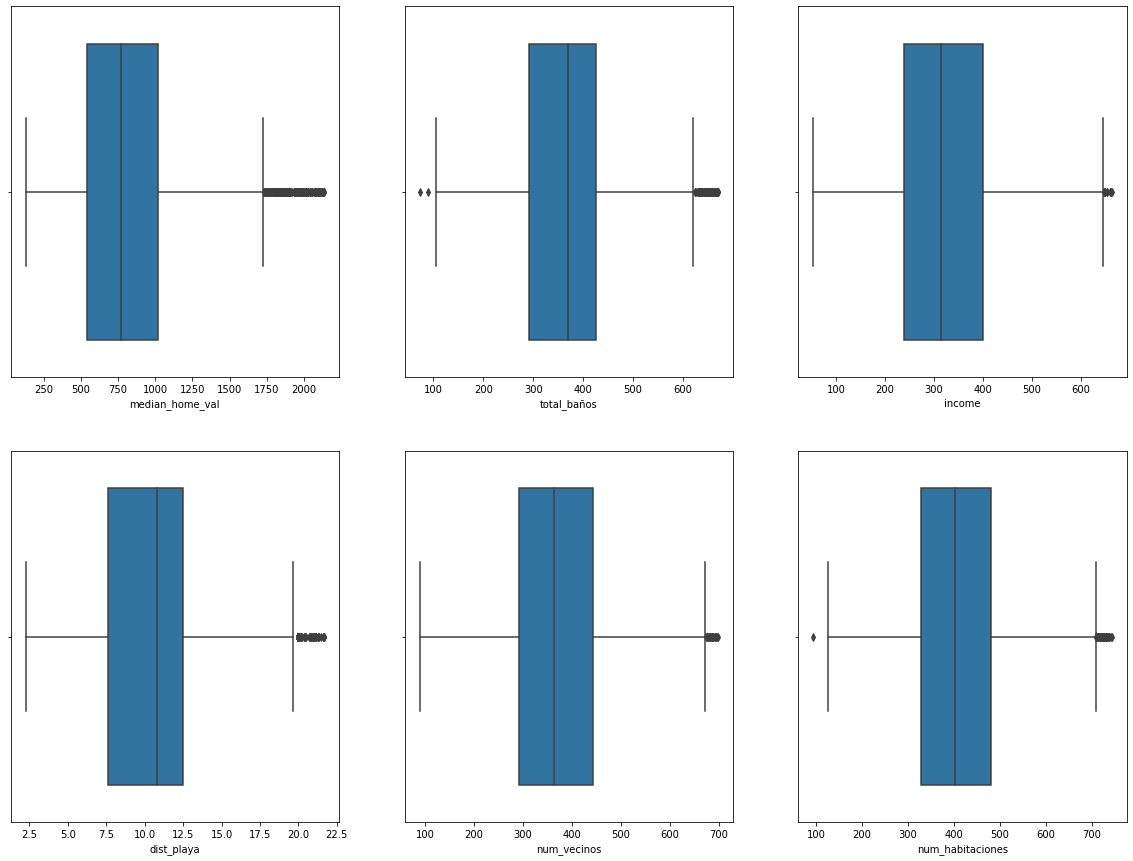

In [57]:
df_numericas2 = df.select_dtypes(include = np.number)

fig, axes = plt.subplots(2, 3, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas2.columns):
    sns.boxplot(x=columna, data=df_numericas2, ax=axes[indice])
plt.show()

In [59]:
# guardamos el csv con los valores cambiados

df.to_csv("data/california_nonull_nooutliers.csv")

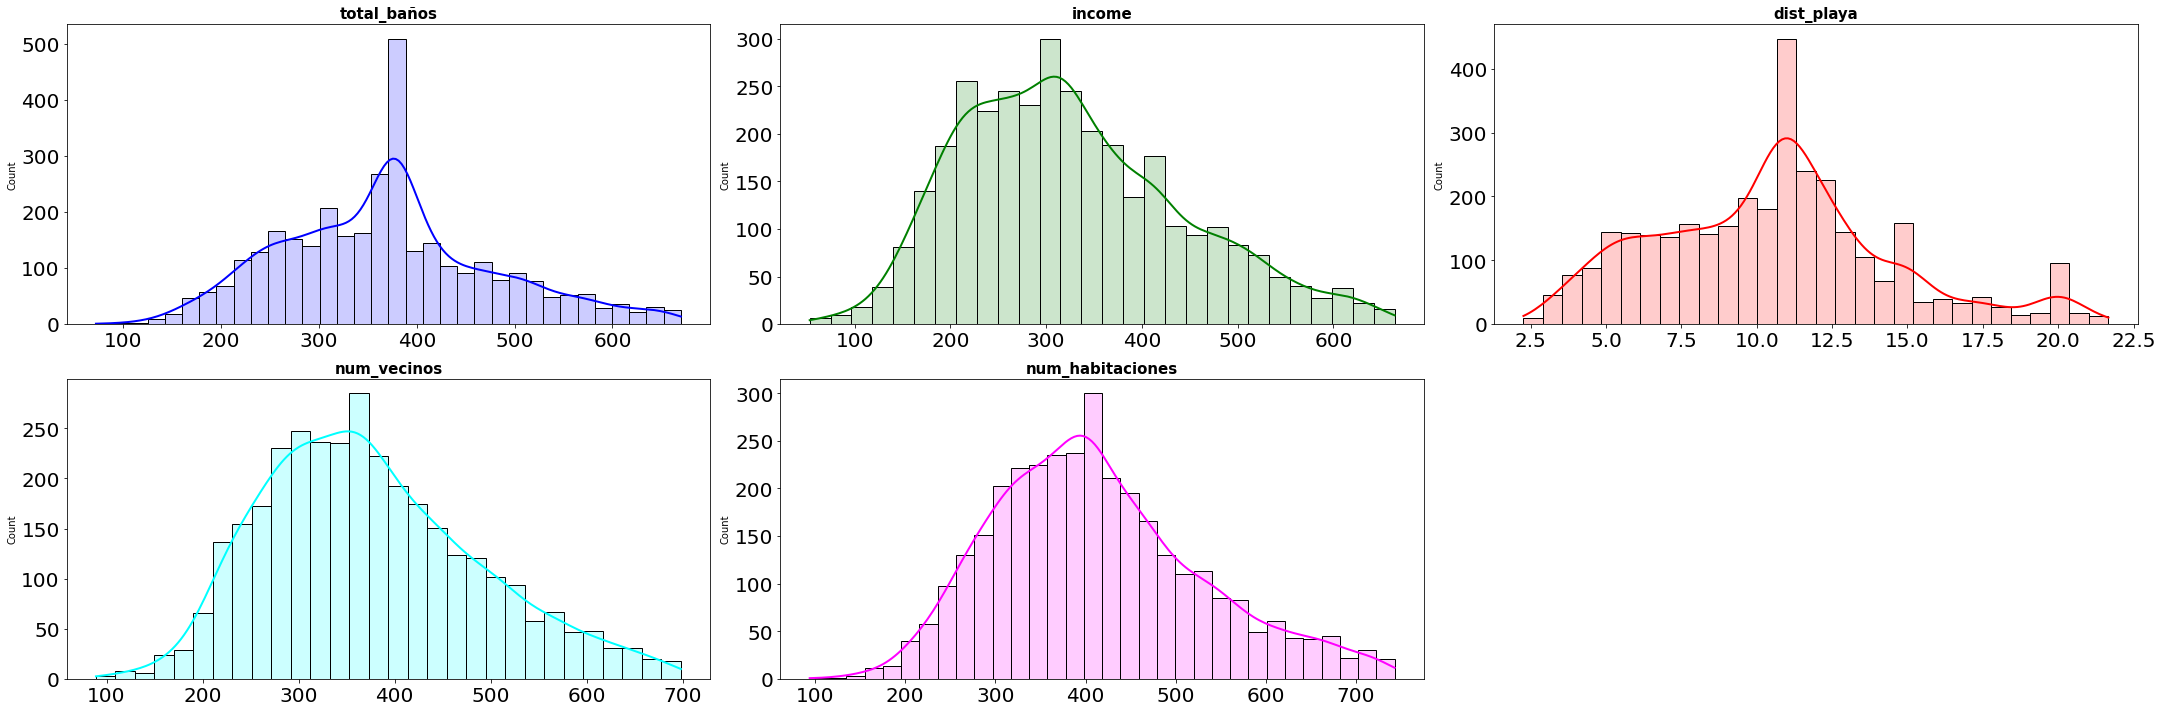

In [60]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("median_home_val")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout()
fig.delaxes(axes[-1]) # Eliminamos el último eje que no se usa;
    


